**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

**Loading dataset**

In [ ]:
data = pd.read_csv('BostonHousing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**Checking Null values**

In [ ]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

**Replacing Null values**

In [ ]:
data['rm'] = data['rm'].fillna(data['rm'].mean())

In [ ]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

**Visualisation**

<Axes: xlabel='rm', ylabel='medv'>

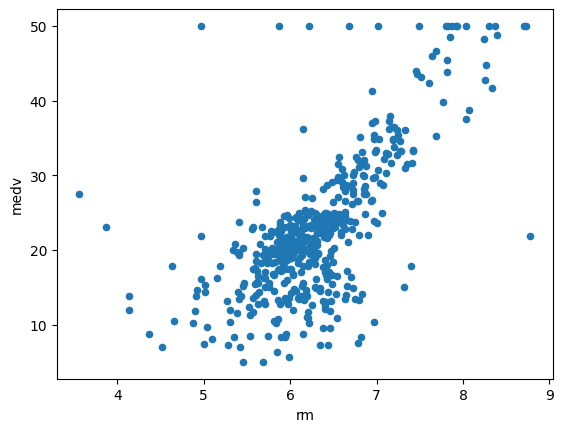

In [ ]:
data.plot.scatter('rm', 'medv')

In this plot its clearly to see a linear pattern.

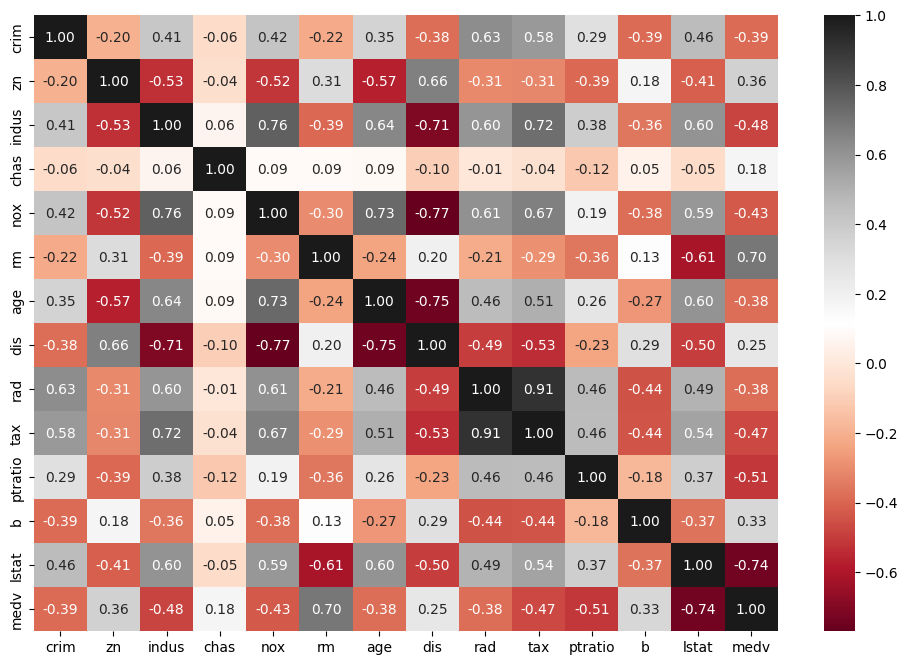

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), cmap = 'RdGy',annot=True, fmt=".2f")
plt.show()

Lets focus at the last line, where **y = medv**:-

**Negative correlation:-** When shades of Red/Orange, the more red the color is on X axis, smaller the medv.

**Zero correlation:-** When light colors, those variables at axis x and y, they dont have any relation.

**Positive correlation:-** When shades of Gray/Black, the more black the color is on X axis, more higher the value medv is.

**'zn' , 'dis', 'rm', 'b', 'chas'** are positively related to **medv**

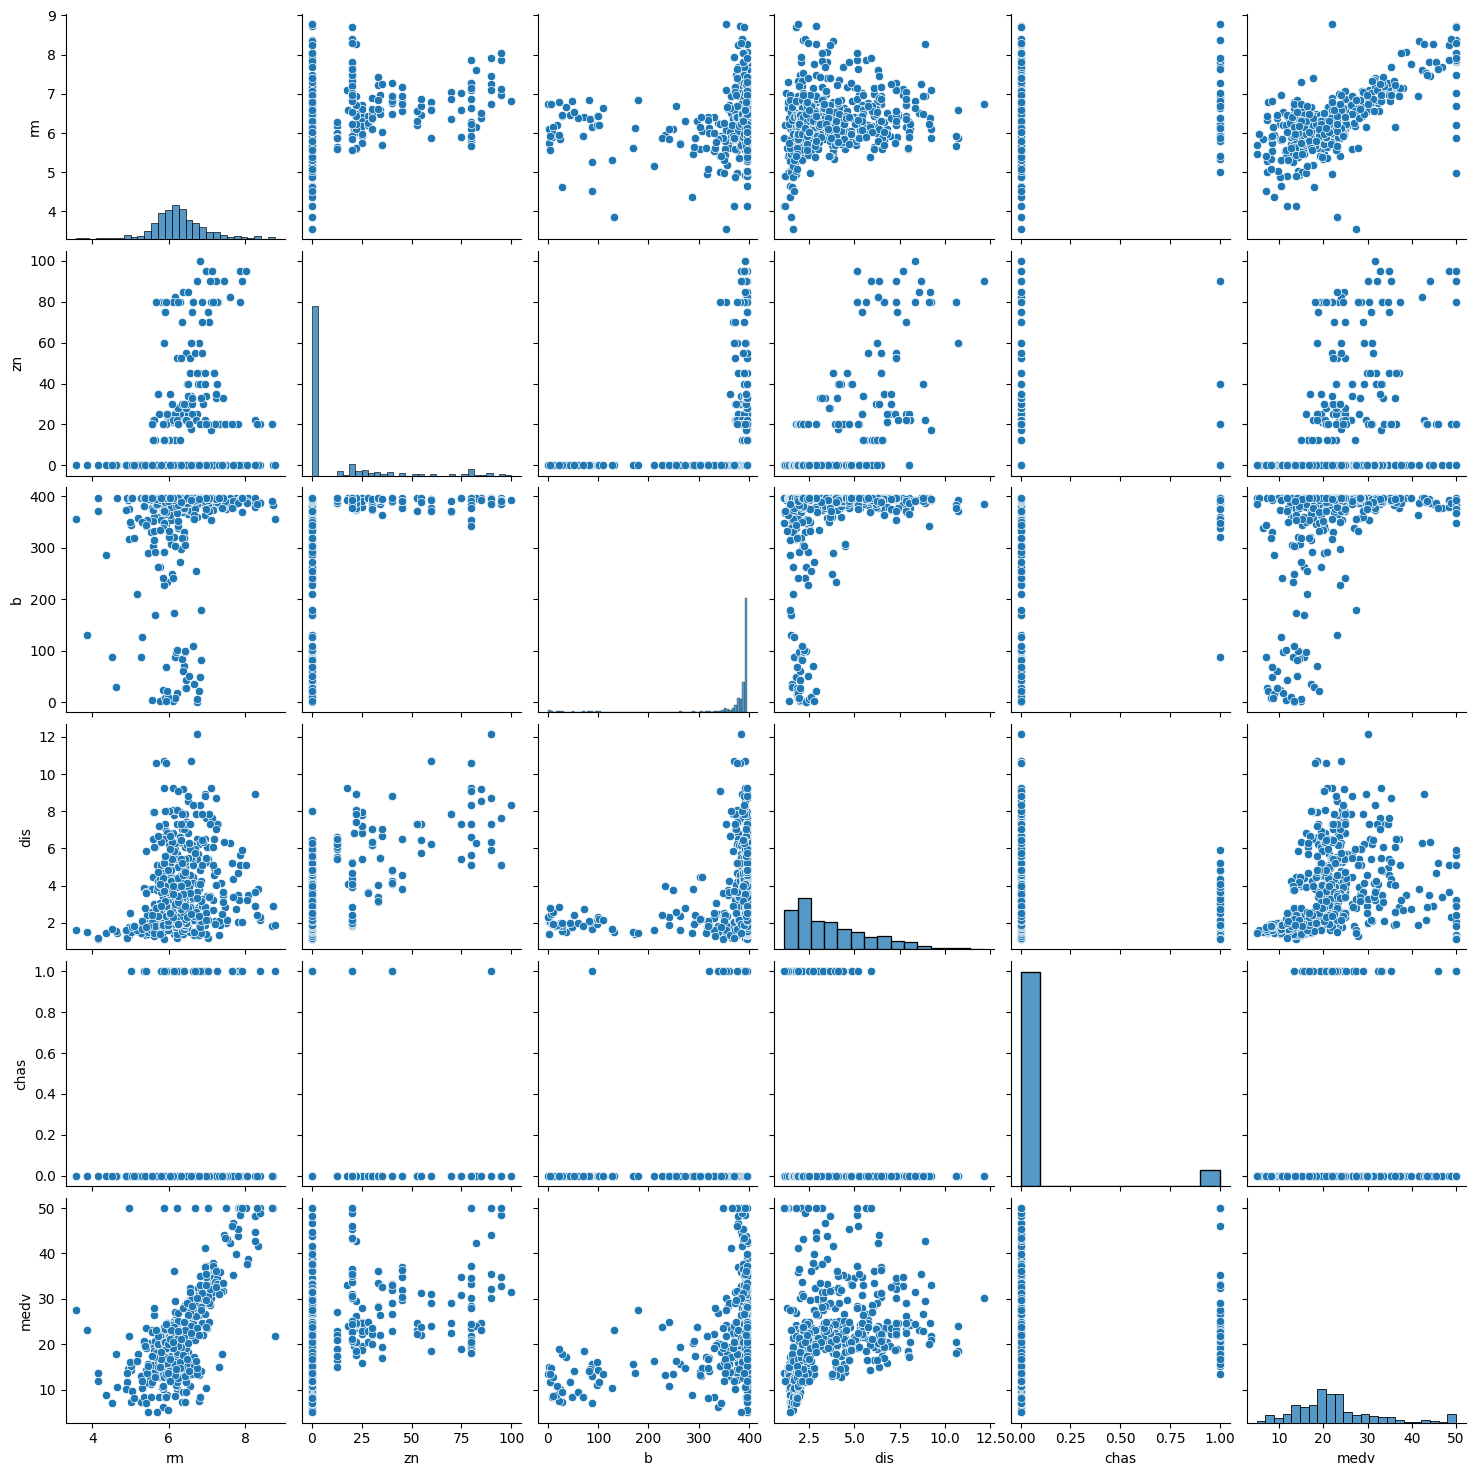

In [ ]:
sns.pairplot(data, vars = ['rm', 'zn', 'b', 'dis', 'chas','medv'])

**Training Linear Regression model**

---


**Define X and Y**

In [ ]:
X = data.drop('medv', axis=1)
y = data['medv']

**# Split the data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

**Fit the model on the training data**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Make predictions on the test set**

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([28.98141872, 36.01423173, 14.82430919, 25.0229357 , 18.77077366,
       23.25088901, 17.65921355, 14.3312157 , 23.01799598, 20.61923725,
       24.91477542, 18.65745019, -6.08024872, 21.75669434, 19.23608436,
       26.18483638, 20.65521785,  5.80089206, 40.48814091, 17.61519761,
       27.23332555, 30.05317191, 11.3328674 , 24.1383693 , 17.86296594,
       15.84437533, 22.77843276, 14.57521147, 22.4366747 , 19.18599316,
       22.42492941, 25.20638527, 25.92633141, 17.7144719 , 16.77105313,
       16.96804968, 31.22105015, 20.12198187, 23.76217047, 24.62043216,
       13.93268126, 32.23349827, 42.65936186, 17.32784863, 27.25487922,
       16.99795581, 14.06061007, 25.89028965, 20.29789589, 29.94485087,
       21.30603148, 34.33630976, 16.03389489, 26.20109252, 39.52390271,
       22.58297123, 18.84703823, 32.71222177, 25.05158461, 12.90043059,
       20.56663412, 30.48440628, 31.50592444, 15.8863132 , 20.23931509,
       16.71637229, 20.52048882, 25.95211452, 30.60472918, 11.60

In [ ]:
columns = ['zn' , 'dis', 'rm', 'b', 'chas','medv(predicted)']
X_test_df = pd.DataFrame(X_test, columns=columns[:-1])

table_data = np.column_stack((X_test_df[:10].values, y_pred[:10]))
headers = columns
table = tabulate(table_data, headers, tablefmt="fancy_grid")
print(table)

╒══════╤════════╤═══════╤════════╤════════╤═══════════════════╕
│   zn │    dis │    rm │      b │   chas │   medv(predicted) │
╞══════╪════════╪═══════╪════════╪════════╪═══════════════════╡
│    0 │ 2.6463 │ 6.416 │ 395.5  │      0 │           28.9814 │
├──────┼────────┼───────┼────────┼────────┼───────────────────┤
│   40 │ 4.0776 │ 6.758 │ 396.9  │      1 │           36.0142 │
├──────┼────────┼───────┼────────┼────────┼───────────────────┤
│    0 │ 1.8681 │ 5.983 │ 390.11 │      0 │           14.8243 │
├──────┼────────┼───────┼────────┼────────┼───────────────────┤
│    0 │ 5.2873 │ 6.065 │ 390.91 │      0 │           25.0229 │
├──────┼────────┼───────┼────────┼────────┼───────────────────┤
│    0 │ 2.3682 │ 6.297 │ 385.09 │      0 │           18.7708 │
├──────┼────────┼───────┼────────┼────────┼───────────────────┤
│    0 │ 4.0522 │ 6.279 │ 373.66 │      0 │           23.2509 │
├──────┼────────┼───────┼────────┼────────┼───────────────────┤
│    0 │ 3.9986 │ 5.914 │ 390.7  │      

In [ ]:
results_df = pd.DataFrame(np.column_stack((y_test, y_pred)),
                          columns=['Actual Price(medv)', 'Predicted Price(medv)'])
table = tabulate(results_df.head(10), headers='keys', tablefmt='fancy_grid',
                 showindex=False)
print(table)

╒══════════════════════╤═════════════════════════╕
│   Actual Price(medv) │   Predicted Price(medv) │
╞══════════════════════╪═════════════════════════╡
│                 23.6 │                 28.9814 │
├──────────────────────┼─────────────────────────┤
│                 32.4 │                 36.0142 │
├──────────────────────┼─────────────────────────┤
│                 13.6 │                 14.8243 │
├──────────────────────┼─────────────────────────┤
│                 22.8 │                 25.0229 │
├──────────────────────┼─────────────────────────┤
│                 16.1 │                 18.7708 │
├──────────────────────┼─────────────────────────┤
│                 20   │                 23.2509 │
├──────────────────────┼─────────────────────────┤
│                 17.8 │                 17.6592 │
├──────────────────────┼─────────────────────────┤
│                 14   │                 14.3312 │
├──────────────────────┼─────────────────────────┤
│                 19.6 │       

**Evaluate the model**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
RSME = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'RMSE: {RSME}')

Mean Squared Error: 24.404825188146287
R-squared: 0.6672089705941906
Mean Absolute Error: 3.2064039639003603
RMSE: 4.940124005340988


Considering the RMSE: We can conclude that this model average error is RMSE at medv, which means **RMSE*1000 in money**

**Visualize the results**

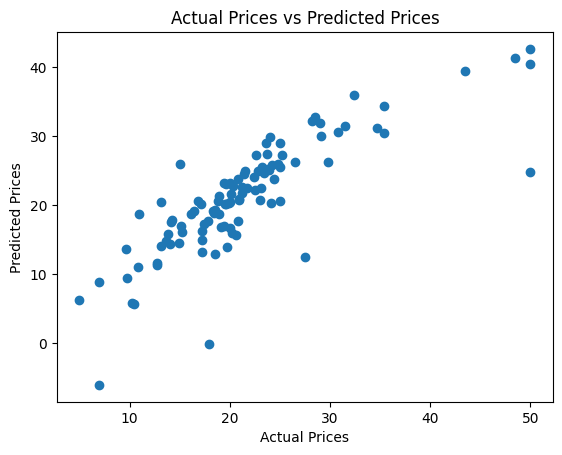

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()